In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
import time

In [3]:
from runner import Runner

In [4]:
R = Runner(verbose=False)

*** GP2 ***
Working directory: /tmp/tmpl9wbzwawGP2


In [5]:
# load our lucchi augmented dataset with flipped images(1980 images and masks)
images = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/gp2_lucchi_augmented_images.npy')
masks = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/gp2_lucchi_augmented_masks.npy')

In [6]:
images.shape

(1980, 512, 512, 1)

In [7]:
images.max()

244

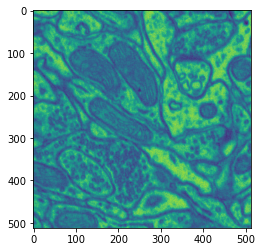

In [10]:
imshow(images[0])

In [8]:
masks.max()

True

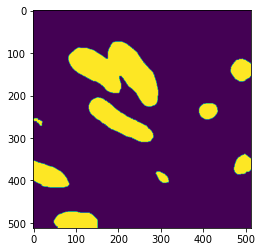

In [9]:
imshow(masks[0])

In [6]:
weights = {
    'A': 0.5,
    'A_train': 0.1,
    'A_val': 0.3,
    'A_test': 0.6,
    'B': 0.3,
    'B_train': 0.7,
    'B_val': 0.1,
    'B_test': 0.2,
    'Z': 0.2
} 
PERCENT_TO_REPLACE = 20

In [7]:
R.setup_data(images, masks, dataset_size=1980, weights=weights)

Weights OK!


In [8]:
RUNS = 10

In [9]:
for run in range(RUNS):
    print('***')
    print('RUN:', run) 
    t0 = time.time()
    R.run_classifier()
    R.run_discriminator()
    l = R.find_machine_labels()
    if l == 0:
        print('No more machine labels.')
        print('TOOK', time.time()-t0, 'seconds')
        break
    R.relabel(percent_to_replace=PERCENT_TO_REPLACE)
    print('TOOK', time.time()-t0, 'seconds')
    

***
RUN: 0
Model saved to /tmp/tmpuq6u7d7yGP2/unet_0.model
History saved to /tmp/tmpuq6u7d7yGP2/history_0.pickle
Testing the classifier...
19/19 [==============================] - 2s 101ms/step - loss: 1.2963 - dice_coeff: 0.1403
Model saved to /tmp/tmpuq6u7d7yGP2/cnnd_0.model
History saved to /tmp/tmpuq6u7d7yGP2/cnnd_history_0.pickle
Testing the discriminator...
4/4 [==============================] - 0s 22ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Found 50 machine labels.
Replacing 10 from 50 !
D_relabeled_ 10
point ids 10
Removed: 10 Filled: 10
TOOK 528.4257924556732 seconds
***
RUN: 1
Model saved to /tmp/tmpuq6u7d7yGP2/unet_1.model
History saved to /tmp/tmpuq6u7d7yGP2/history_1.pickle
Testing the classifier...
19/19 [==============================] - 2s 100ms/step - loss: 1.2475 - dice_coeff: 0.1438
Testing the discriminator...
4/4 [==============================] - 0s 22ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Found 59 machine labels.
Replacing 11 from 59 !
D_relabeled_ 11


In [10]:
R.classifier_scores

[[1.2962908744812012, 0.14033353328704834],
 [1.2474619150161743, 0.14377707242965698],
 [1.2026615142822266, 0.13984175026416779],
 [1.184785008430481, 0.13071537017822266],
 [1.176754355430603, 0.13066309690475464],
 [1.1976972818374634, 0.13392983376979828],
 [1.1863266229629517, 0.15492132306098938],
 [1.0349715948104858, 0.26711156964302063],
 [0.9336327910423279, 0.3308262526988983],
 [0.8949022889137268, 0.3602405786514282]]

In [11]:
R.discriminator_scores

[[0.0, 1.0],
 [0.0, 1.0],
 [0.3124590814113617, 0.9830508232116699],
 [0.0005611183005385101, 1.0],
 [0.9969465732574463, 0.9661017060279846],
 [28.088991165161133, 0.8559321761131287],
 [100.29560089111328, 0.8305084705352783],
 [390.79351806640625, 0.7288135886192322],
 [651.6740112304688, 0.7118644118309021],
 [461.57318115234375, 0.7203390002250671]]

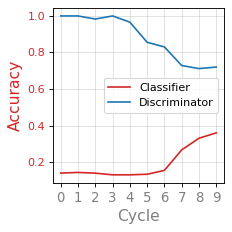

In [12]:
R.plot()